In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%pushd "/content/drive/MyDrive/MSSP-607/Assignment/Week_10"

/content/drive/MyDrive/MSSP-607/Assignment/Week_10


['/content']

In [10]:
from matplotlib import pyplot as plt
import random
from numpy import random as nprand
import networkx as nx
import pandas as pd
from itertools import combinations

In [5]:
df = pd.read_csv('Network Analysis - Sheet1.csv')
print(df)

   Student ID      Name  Age    Major  Year                    Interests
0           1      Jeff   24  MSSP DA     1  Lying down & binge watching
1           2     Yufei   23  MSSP DA     1      Fitness training & Yoga
2           3  Danielle   23  MSSP DA     1              Arts and crafts
3           4     Guoli   23  MSSP DA     1                  Working out
4           5   Dacheng   17  MSSP DA     1                       Eating


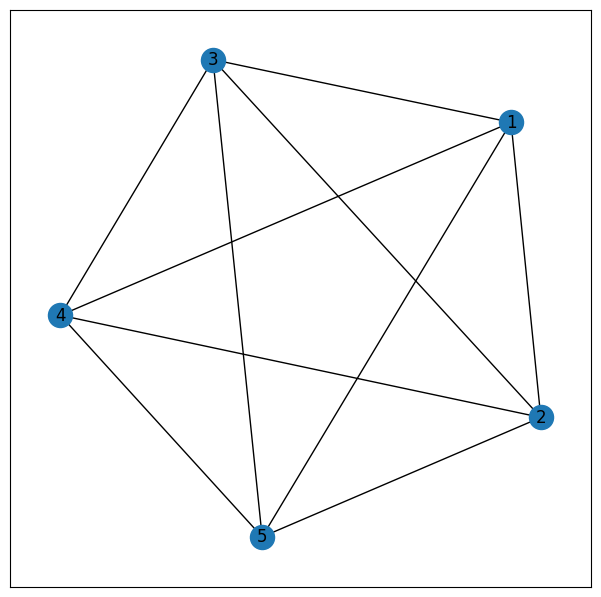

In [13]:
G = nx.Graph()

for _, row in df.iterrows():
   for _, row in df.iterrows():
    G.add_node(row['Student ID'],
               Name=row['Name'],
               Age=row['Age'],
               Major=row['Major'],
               Year=row['Year'],
               Interests=row['Interests'])


for (id1, major1, year1), (id2, major2, year2) in combinations(df[['Student ID', 'Major', 'Year']].values, 2):
    if major1 == major2 and year1 == year2:
        G.add_edge(id1, id2)

plt.figure(figsize=(7.5, 7.5))
nx.draw_networkx(G)

In [14]:
degree_centrality = nx.degree_centrality(G)

max_degree = max(degree_centrality.values())
most_connected_students = [node for node, centrality in degree_centrality.items() if centrality == max_degree]

print("Degree Centrality for each student:", degree_centrality)
print("Most connected student(s):", most_connected_students)

Degree Centrality for each student: {1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0}
Most connected student(s): [1, 2, 3, 4, 5]


In [15]:
clustering_coefficient = nx.clustering(G)

highly_interconnected_students = [node for node, coef in clustering_coefficient.items() if coef > 0.8]

print("Clustering Coefficient for each student:", clustering_coefficient)
print("Students with highly interconnected groups:", highly_interconnected_students)

Clustering Coefficient for each student: {1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0}
Students with highly interconnected groups: [1, 2, 3, 4, 5]


In [16]:
shortest_path_lengths = dict(nx.shortest_path_length(G))

max_distance = 0
furthest_pair = None
for student1, lengths in shortest_path_lengths.items():
    for student2, distance in lengths.items():
        if distance > max_distance:
            max_distance = distance
            furthest_pair = (student1, student2)

print("Shortest path lengths between all pairs of students:", shortest_path_lengths)
print("Pair of students who are furthest apart:", furthest_pair, "with a distance of", max_distance)

Shortest path lengths between all pairs of students: {1: {1: 0, 2: 1, 3: 1, 4: 1, 5: 1}, 2: {2: 0, 1: 1, 3: 1, 4: 1, 5: 1}, 3: {3: 0, 1: 1, 2: 1, 4: 1, 5: 1}, 4: {4: 0, 1: 1, 2: 1, 3: 1, 5: 1}, 5: {5: 0, 1: 1, 2: 1, 3: 1, 4: 1}}
Pair of students who are furthest apart: (1, 2) with a distance of 1


Community partition: {1: 0, 2: 0, 3: 0, 4: 0, 5: 0}


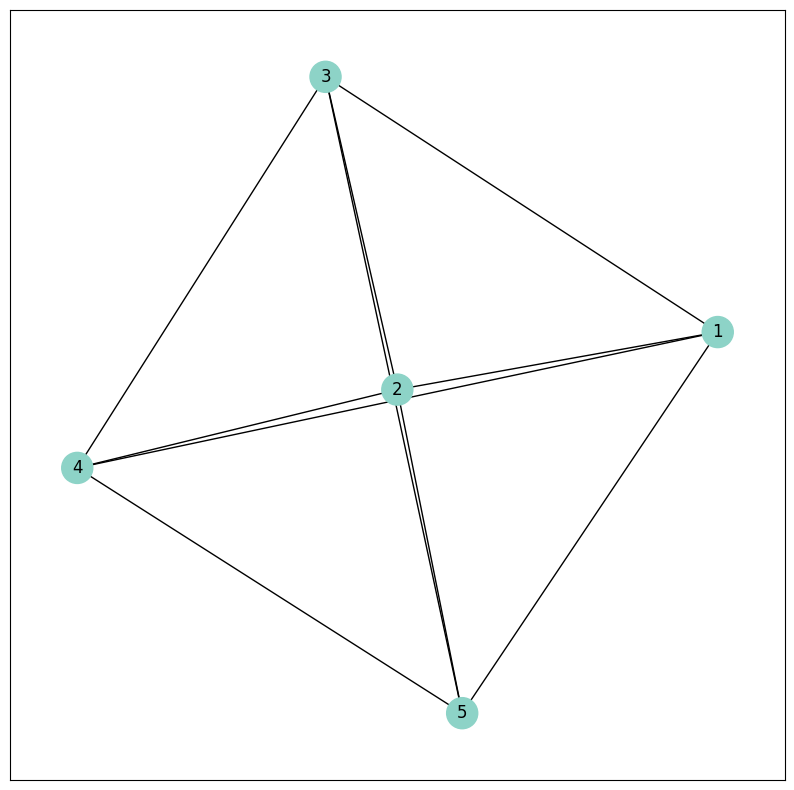

In [18]:
import community as community_louvain
import matplotlib.pyplot as plt
import community.community_louvain as community_louvain

partition = community_louvain.best_partition(G)

print("Community partition:", partition)

colors = [partition[node] for node in G.nodes]

plt.figure(figsize=(10, 10))
nx.draw_networkx(G, node_color=colors, with_labels=True, node_size=500, cmap=plt.cm.Set3)
plt.show()

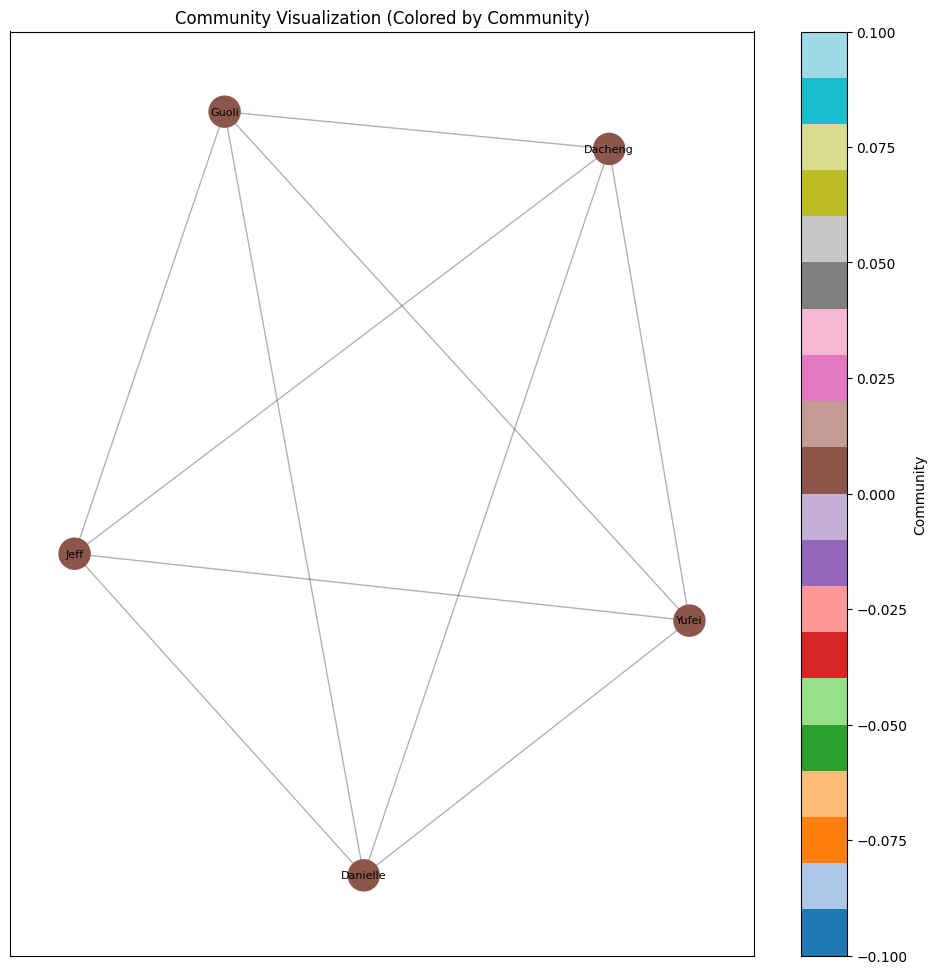

In [21]:
partition = community_louvain.best_partition(G)
community_colors = [partition[node] for node in G.nodes]

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)
nx.draw_networkx_edges(G, pos, alpha=0.3)
nodes = nx.draw_networkx_nodes(G, pos, node_size=500, node_color=community_colors, cmap=plt.cm.tab20)
nx.draw_networkx_labels(G, pos, labels={node: G.nodes[node]['Name'] for node in G.nodes}, font_size=8)

plt.colorbar(nodes, label="Community")

plt.title("Community Visualization (Colored by Community)")
plt.show()


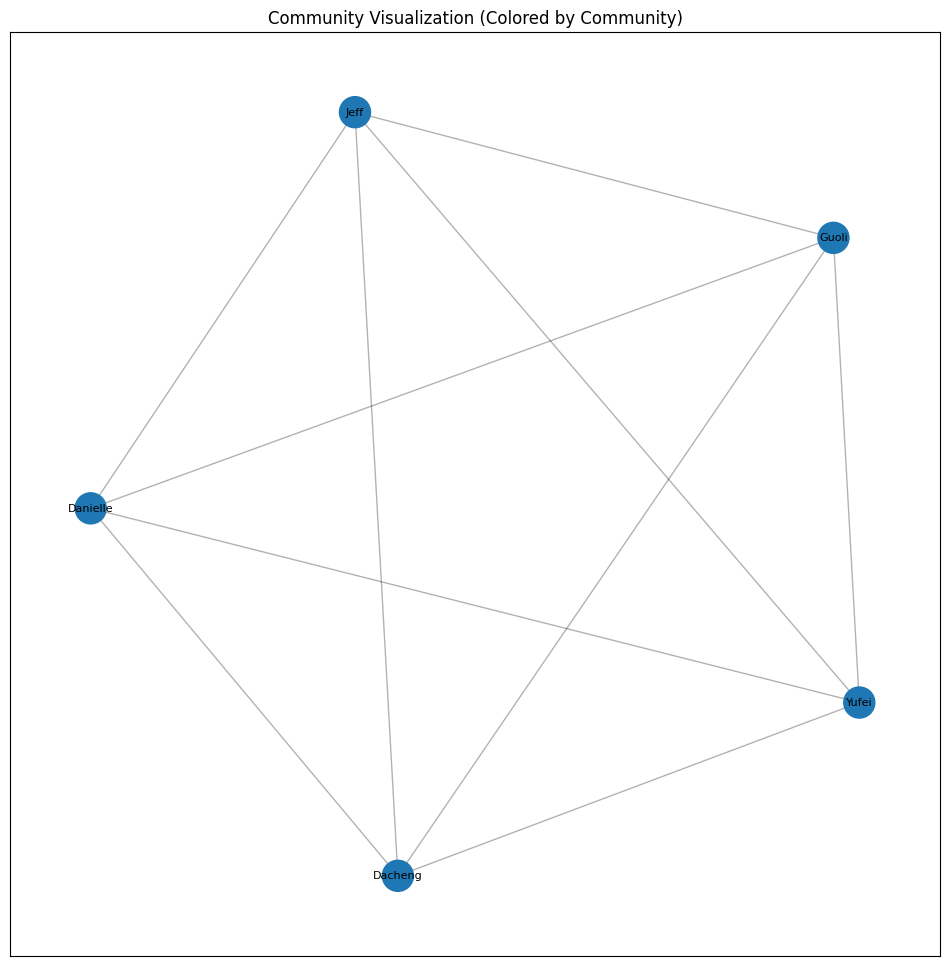

In [22]:
partition = community_louvain.best_partition(G)

community_colors = [partition[node] for node in G.nodes]

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_nodes(G, pos, node_size=500, node_color=community_colors, cmap=plt.cm.tab20)
nx.draw_networkx_labels(G, pos, labels={node: G.nodes[node]['Name'] for node in G.nodes}, font_size=8)

plt.title("Community Visualization (Colored by Community)")
plt.show()

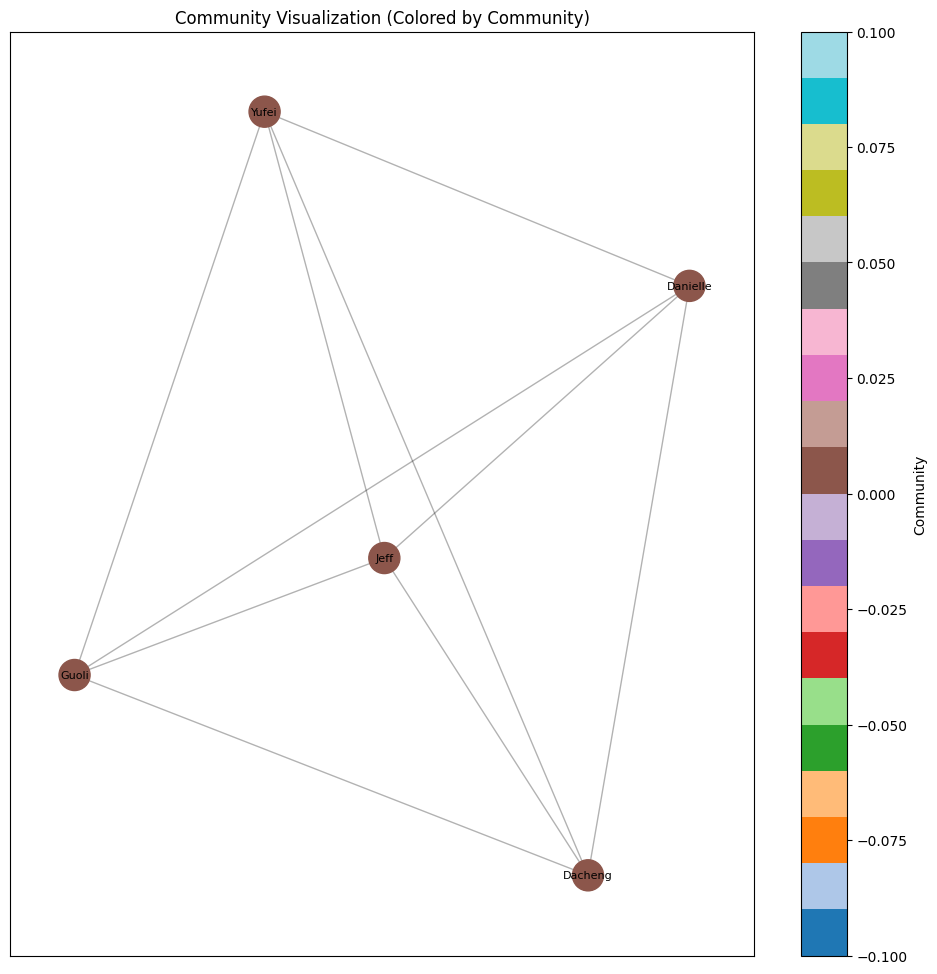

In [26]:
partition = community_louvain.best_partition(G)
community_colors = [partition[node] for node in G.nodes]

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)
nx.draw_networkx_edges(G, pos, alpha=0.3)
nodes = nx.draw_networkx_nodes(G, pos, node_size=500, node_color=community_colors, cmap=plt.cm.tab20)
nx.draw_networkx_labels(G, pos, labels={node: G.nodes[node]['Name'] for node in G.nodes}, font_size=8)

plt.colorbar(nodes, label="Community")

plt.title("Community Visualization (Colored by Community)")
plt.show()

